Linear Regression using Pytorch

In [0]:
import torch
from torch.nn import  Linear
import torch.nn as nn  # torch.nn is a  Base class for all neural network modules.
from matplotlib import pyplot as plt
import numpy as np

To create a linear model, lets initialise two variables : w and b, as equation of line is y=wx+b where w is the slope of the line and b is the bias.  So here we will train the model to get optimal values of w and b, which will give us the line of best fit. 

In [0]:
w=torch.tensor(3.0,requires_grad=True)  # lets randomly declare w and b
b=torch.tensor(1.0,requires_grad=True)

In [0]:
def forward(x):    #The forward function would generate the value y for the given value of x.
  y=w*x+b;
  return y

In [0]:
x=torch.tensor([[4],[7]])   # to compute same operation on multiple variables make sure to follow the syntax i.e. inside box brackets
forward(x)      # here the values of y is generated from different values of x. Thus predicted y value is now generated for different values of x

tensor([[13],
        [22]], grad_fn=<AddBackward0>)

In [0]:
torch.manual_seed(13)  # sets a seed for random numbers. This will help us while creating a random value for the linear class

In [0]:
model=Linear(in_features=1,out_features=1) #The parameters mean that the size of in and out feature is 1
print(model.bias, model.weight)    # the weights and bias to generate the model can be determined

Parameter containing:
tensor([-0.0412], requires_grad=True) Parameter containing:
tensor([[-0.8164]], requires_grad=True)


In [0]:
x_one=torch.tensor([2.0])
print(model(x_one))   # the output value is predicted for one value. We can also generate output values for many numbers

tensor([-1.6740], grad_fn=<AddBackward0>)


In [0]:
class LinearRegressionModel(nn.Module):  #nn.Model will be the super class and we will inherit this class to implement the model
  def __init__(self,input_size,output_size ):   # constructor to create instance of the class
    super().__init__()    # initialises the contructor of parent class i.e nn.model
    self.linear=nn.Linear(input_size,output_size)    
    
  def forward(self,x):   
    pred=self.linear(x)
    return pred

In [0]:
model=LinearRegressionModel(1,1)

In [0]:
list(model.parameters())   # this attribute retuens 


[Parameter containing:
 tensor([[0.6211]], requires_grad=True), Parameter containing:
 tensor([-0.9698], requires_grad=True)]

In [0]:
x_two=torch.tensor([[1.0],[2.0]])
model.forward(x_two)

tensor([[-0.3487],
        [ 0.2724]], grad_fn=<AddmmBackward>)

Creating a Dataset to train our model

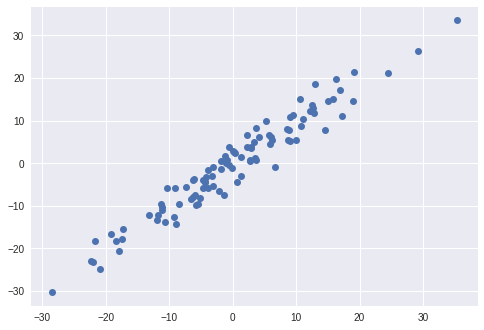

In [0]:
X=torch.randn(100,1)*10
Y=X+3*torch.randn(100,1)
plt.plot(X.numpy(),Y.numpy(),'o')

In [0]:
[w,b]=model.parameters()
print(w)     # w in a two dim array
print(b)     # b is one dim array
def get_parameter():
  return (w[0][0].item(),b[0].item())  # .item converts the tensor object to number

Parameter containing:
tensor([[0.6211]], requires_grad=True)
Parameter containing:
tensor([-0.9698], requires_grad=True)


In [0]:
def plot_fit(title):
  plt.title(title)
  w1,b1=get_parameter()
  x1=np.array([-30,30])
  y1=w1*x1+b1
  plt.plot(x1,y1,'g')
  plt.scatter(X,Y)

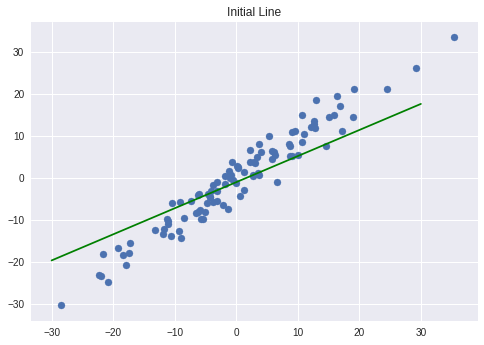

In [0]:
plot_fit("Initial Line")

In [0]:
criteria=nn.MSELoss()   #defines the mean squared error loss function
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)   # defines the optimizer of the model

In [0]:
epochs=100
losses=[]
for i in range(epochs):
  y_pred=model.forward(X)
  loss=criteria(y_pred,Y)
  print("Epoch:", i, "Loss: ",loss.item())
  
  losses.append(loss)  # append the loss into a list
  optimizer.zero_grad()  # As the gradients get accumulated due to the backward call, they should be set to zero 
  loss.backward()   # propogate the loss and thus computes the gradient
  optimizer.step()    #update the parameters of the models and is called after the gradients are computed

Epoch: 0 Loss:  24.914175033569336
Epoch: 1 Loss:  17.17302131652832
Epoch: 2 Loss:  12.985124588012695
Epoch: 3 Loss:  10.719206809997559
Epoch: 4 Loss:  9.492897033691406
Epoch: 5 Loss:  8.8289213180542
Epoch: 6 Loss:  8.469117164611816
Epoch: 7 Loss:  8.273843765258789
Epoch: 8 Loss:  8.16756820678711
Epoch: 9 Loss:  8.109434127807617
Epoch: 10 Loss:  8.077343940734863
Epoch: 11 Loss:  8.059342384338379
Epoch: 12 Loss:  8.048964500427246
Epoch: 13 Loss:  8.04271411895752
Epoch: 14 Loss:  8.0386962890625
Epoch: 15 Loss:  8.035890579223633
Epoch: 16 Loss:  8.03374195098877
Epoch: 17 Loss:  8.031952857971191
Epoch: 18 Loss:  8.03035831451416
Epoch: 19 Loss:  8.028873443603516
Epoch: 20 Loss:  8.027449607849121
Epoch: 21 Loss:  8.02606201171875
Epoch: 22 Loss:  8.02469539642334
Epoch: 23 Loss:  8.02334213256836
Epoch: 24 Loss:  8.022001266479492
Epoch: 25 Loss:  8.02066707611084
Epoch: 26 Loss:  8.019339561462402
Epoch: 27 Loss:  8.01801872253418
Epoch: 28 Loss:  8.016702651977539
Epoch

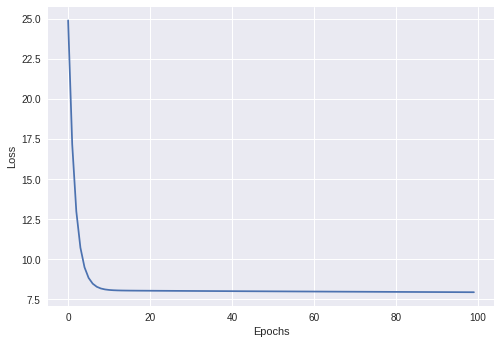

In [0]:
plt.plot(range(epochs),losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

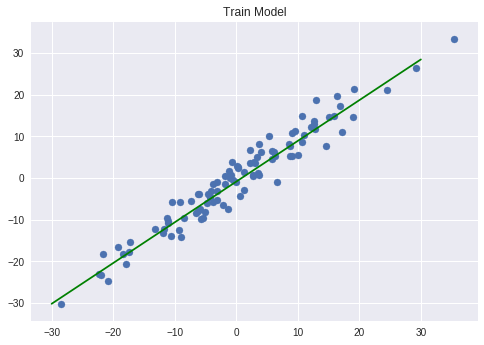

In [0]:
plot_fit("Train Model")

In [1]:
from flask import Flask
app = Flask(__name__)
 
@app.route("/")
def hello():
  return "Hello World!"
 
if __name__ == "__main__":
app.run()

IndentationError: ignored

In [0]:
$ python hello.py